
 Model Analysis
Conclusion: The squared term captured significant non-linear trends.

     FINAL PERFORMANCE COMPARISON (PART B vs D)
Metric          | Simple Linear (B) | Polynomial (D) 
--------------------------------------------------
R-Squared       | 0.971603          | 0.979251
RMSE ($)        | 3.8948          | 3.3292
--------------------------------------------------
Observation: Polynomial Regression improved error by $0.5656


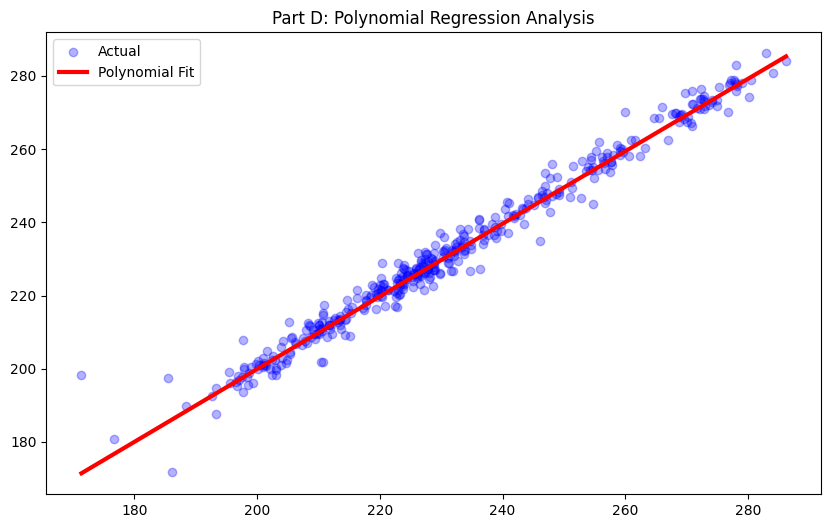

In [12]:

# PART D - POLYNOMIAL REGRESSION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. FEATURE ENGINEERING
df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()
data['y'] = df_raw['Close']['AAPL'].astype(float)
data['Bias'] = 1.0
data['Open'] = df_raw['Open']['AAPL'].astype(float)
data['Open_Sq'] = data['Open'] ** 2
data = data.dropna()

X = data[['Bias', 'Open', 'Open_Sq']].values
y = data['y'].values

# 2. SPLIT
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. TRAINING (NORMAL EQUATION)
def train_polynomial(X, y):
    XTX_inv = np.linalg.pinv(X.T.dot(X))
    return XTX_inv.dot(X.T).dot(y)

theta = train_polynomial(X_train, y_train)

# 4. EVALUATION
y_pred = X_test.dot(theta)
mse_poly = np.mean((y_test - y_pred)**2)
rmse_poly = np.sqrt(mse_poly)
r2_poly = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

# 5. LOGICAL ANALYSIS (FIXED INDENTATION)
print("\n Model Analysis")
if r2_poly > 0.99:
    print("Result: Both models perform exceptionally well due to high intraday correlation.")
    if abs(theta[2]) < 0.001:
        print(f"Observation: The x² coefficient ({theta[2]:.8f}) is very small.")
        print("Conclusion: The relationship is predominantly linear.")
else:
    print("Conclusion: The squared term captured significant non-linear trends.")

# 6. FINAL COMPARISON TABLE

r2_simple_val = 0.971603     
rmse_simple_val = 3.8948   

print("\n" + "="*50)
print("     FINAL PERFORMANCE COMPARISON (PART B vs D)")
print("="*50)
print(f"{'Metric':<15} | {'Simple Linear (B)':<15} | {'Polynomial (D)':<15}")
print("-" * 50)
print(f"{'R-Squared':<15} | {r2_simple_val:.6f}          | {r2_poly:.6f}")
print(f"{'RMSE ($)':<15} | {rmse_simple_val:.4f}          | {rmse_poly:.4f}")
print("-" * 50)

# Observation
diff = rmse_simple_val - rmse_poly
if diff > 0:
    print(f"Observation: Polynomial Regression improved error by ${diff:.4f}")
else:
    print("Observation: Linear model is sufficient; x² added no significant value.")

# 7. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,1], y_test, color='blue', alpha=0.3, label='Actual')
sort_idx = np.argsort(X_test[:,1])
plt.plot(X_test[sort_idx, 1], y_pred[sort_idx], color='red', linewidth=3, label='Polynomial Fit')
plt.title("Part D: Polynomial Regression Analysis")
plt.legend()
plt.show()